In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

simple_results = []
with open('simple_results_1000_1100.txt') as fin:
    for line in fin:
        simple_results.append([float(n) for n in line.split()])
        
block_results = []
with open('block_results_1000_1100.txt') as fin:
    for line in fin:
        block_results.append([float(n) for n in line.split()])
        
swapped_results = []
with open('swapped_results_1000_1100.txt') as fin:
    for line in fin:
        swapped_results.append([float(n) for n in line.split()])

        
plt.rcParams["figure.figsize"] = (15, 7)

## Простое умножение матриц

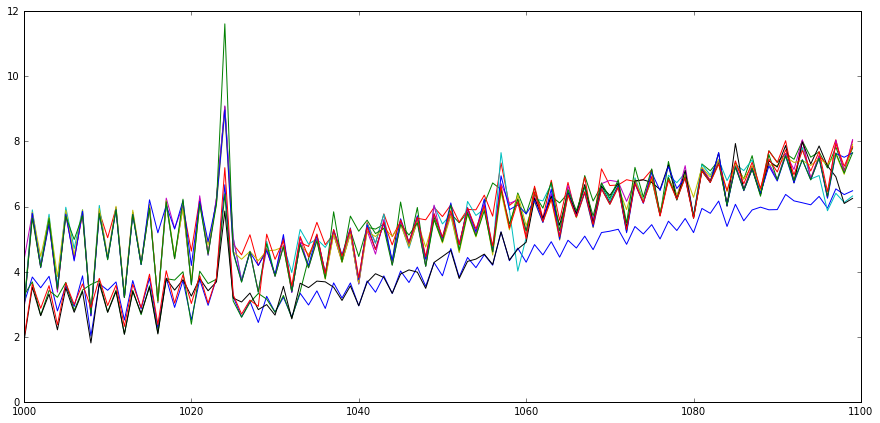

In [11]:
for results in simple_results:
    plt.plot(xrange(1000, 1100), results)
plt.show()

## Блочное умножение матриц

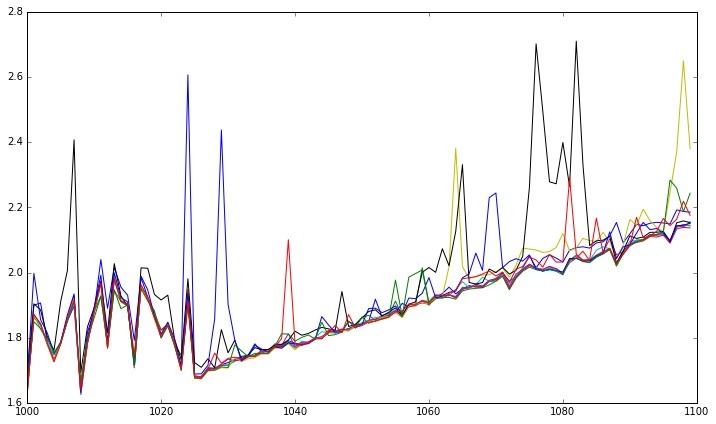

In [4]:
for results in block_results:
    plt.plot(xrange(1000, 1100), results)
plt.show()

## Свапнутое умножение

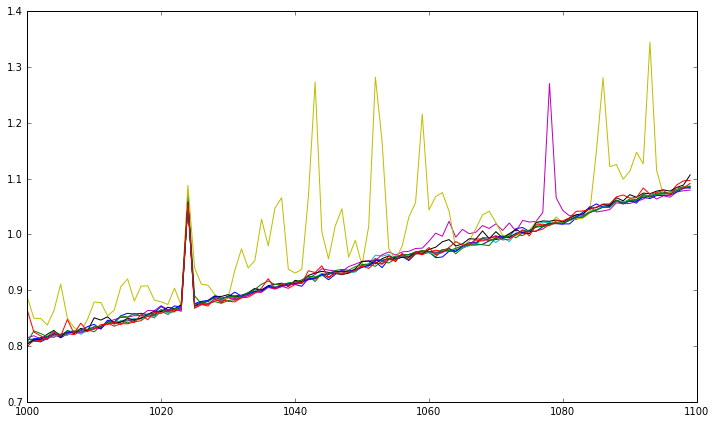

In [5]:
for results in swapped_results:
    plt.plot(xrange(1000, 1100), results)
plt.show()

## Сравнение трех методов вместе

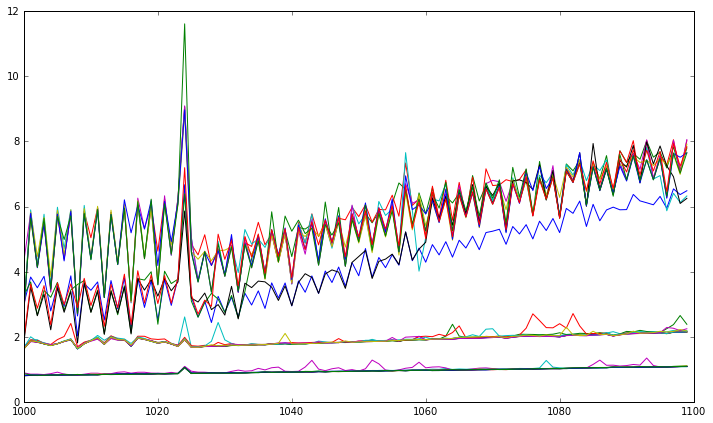

In [6]:
import matplotlib.pyplot as plt


for results in simple_results:
    plt.plot(xrange(1000, 1100), results)
for results in block_results:
    plt.plot(xrange(1000, 1100), results)
for results in swapped_results:
    plt.plot(xrange(1000, 1100), results)

plt.show()